In [5]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [11]:
#SECTION 2
#step 1: load the datasets
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()
dataset_description = diabetes_data.describe()
dataset_info = diabetes_data.info()
print(dataset_description)
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.

In [12]:
# Data Pre-processing
## Handling Missing Values
missing_values = diabetes_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Detecting outliers using the IQR method
Q1 = diabetes_data.quantile(0.25)
Q3 = diabetes_data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((diabetes_data < (Q1 - 1.5 * IQR)) | (diabetes_data > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Outliers:
 Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


In [10]:
#Outliers treatment using IQR method
Q1 = diabetes_data.quantile(0.25)
Q3 = diabetes_data.quantile(0.75)
IQR = Q3 - Q1
diabetes_data = diabetes_data[~((diabetes_data < (Q1 - 1.5 * IQR)) | (diabetes_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [59]:
#Standarization using StandardScaler
scaler = MinMaxScaler()
diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.fit_transform(diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

C:\Users\aayus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aayus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aayus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aayus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

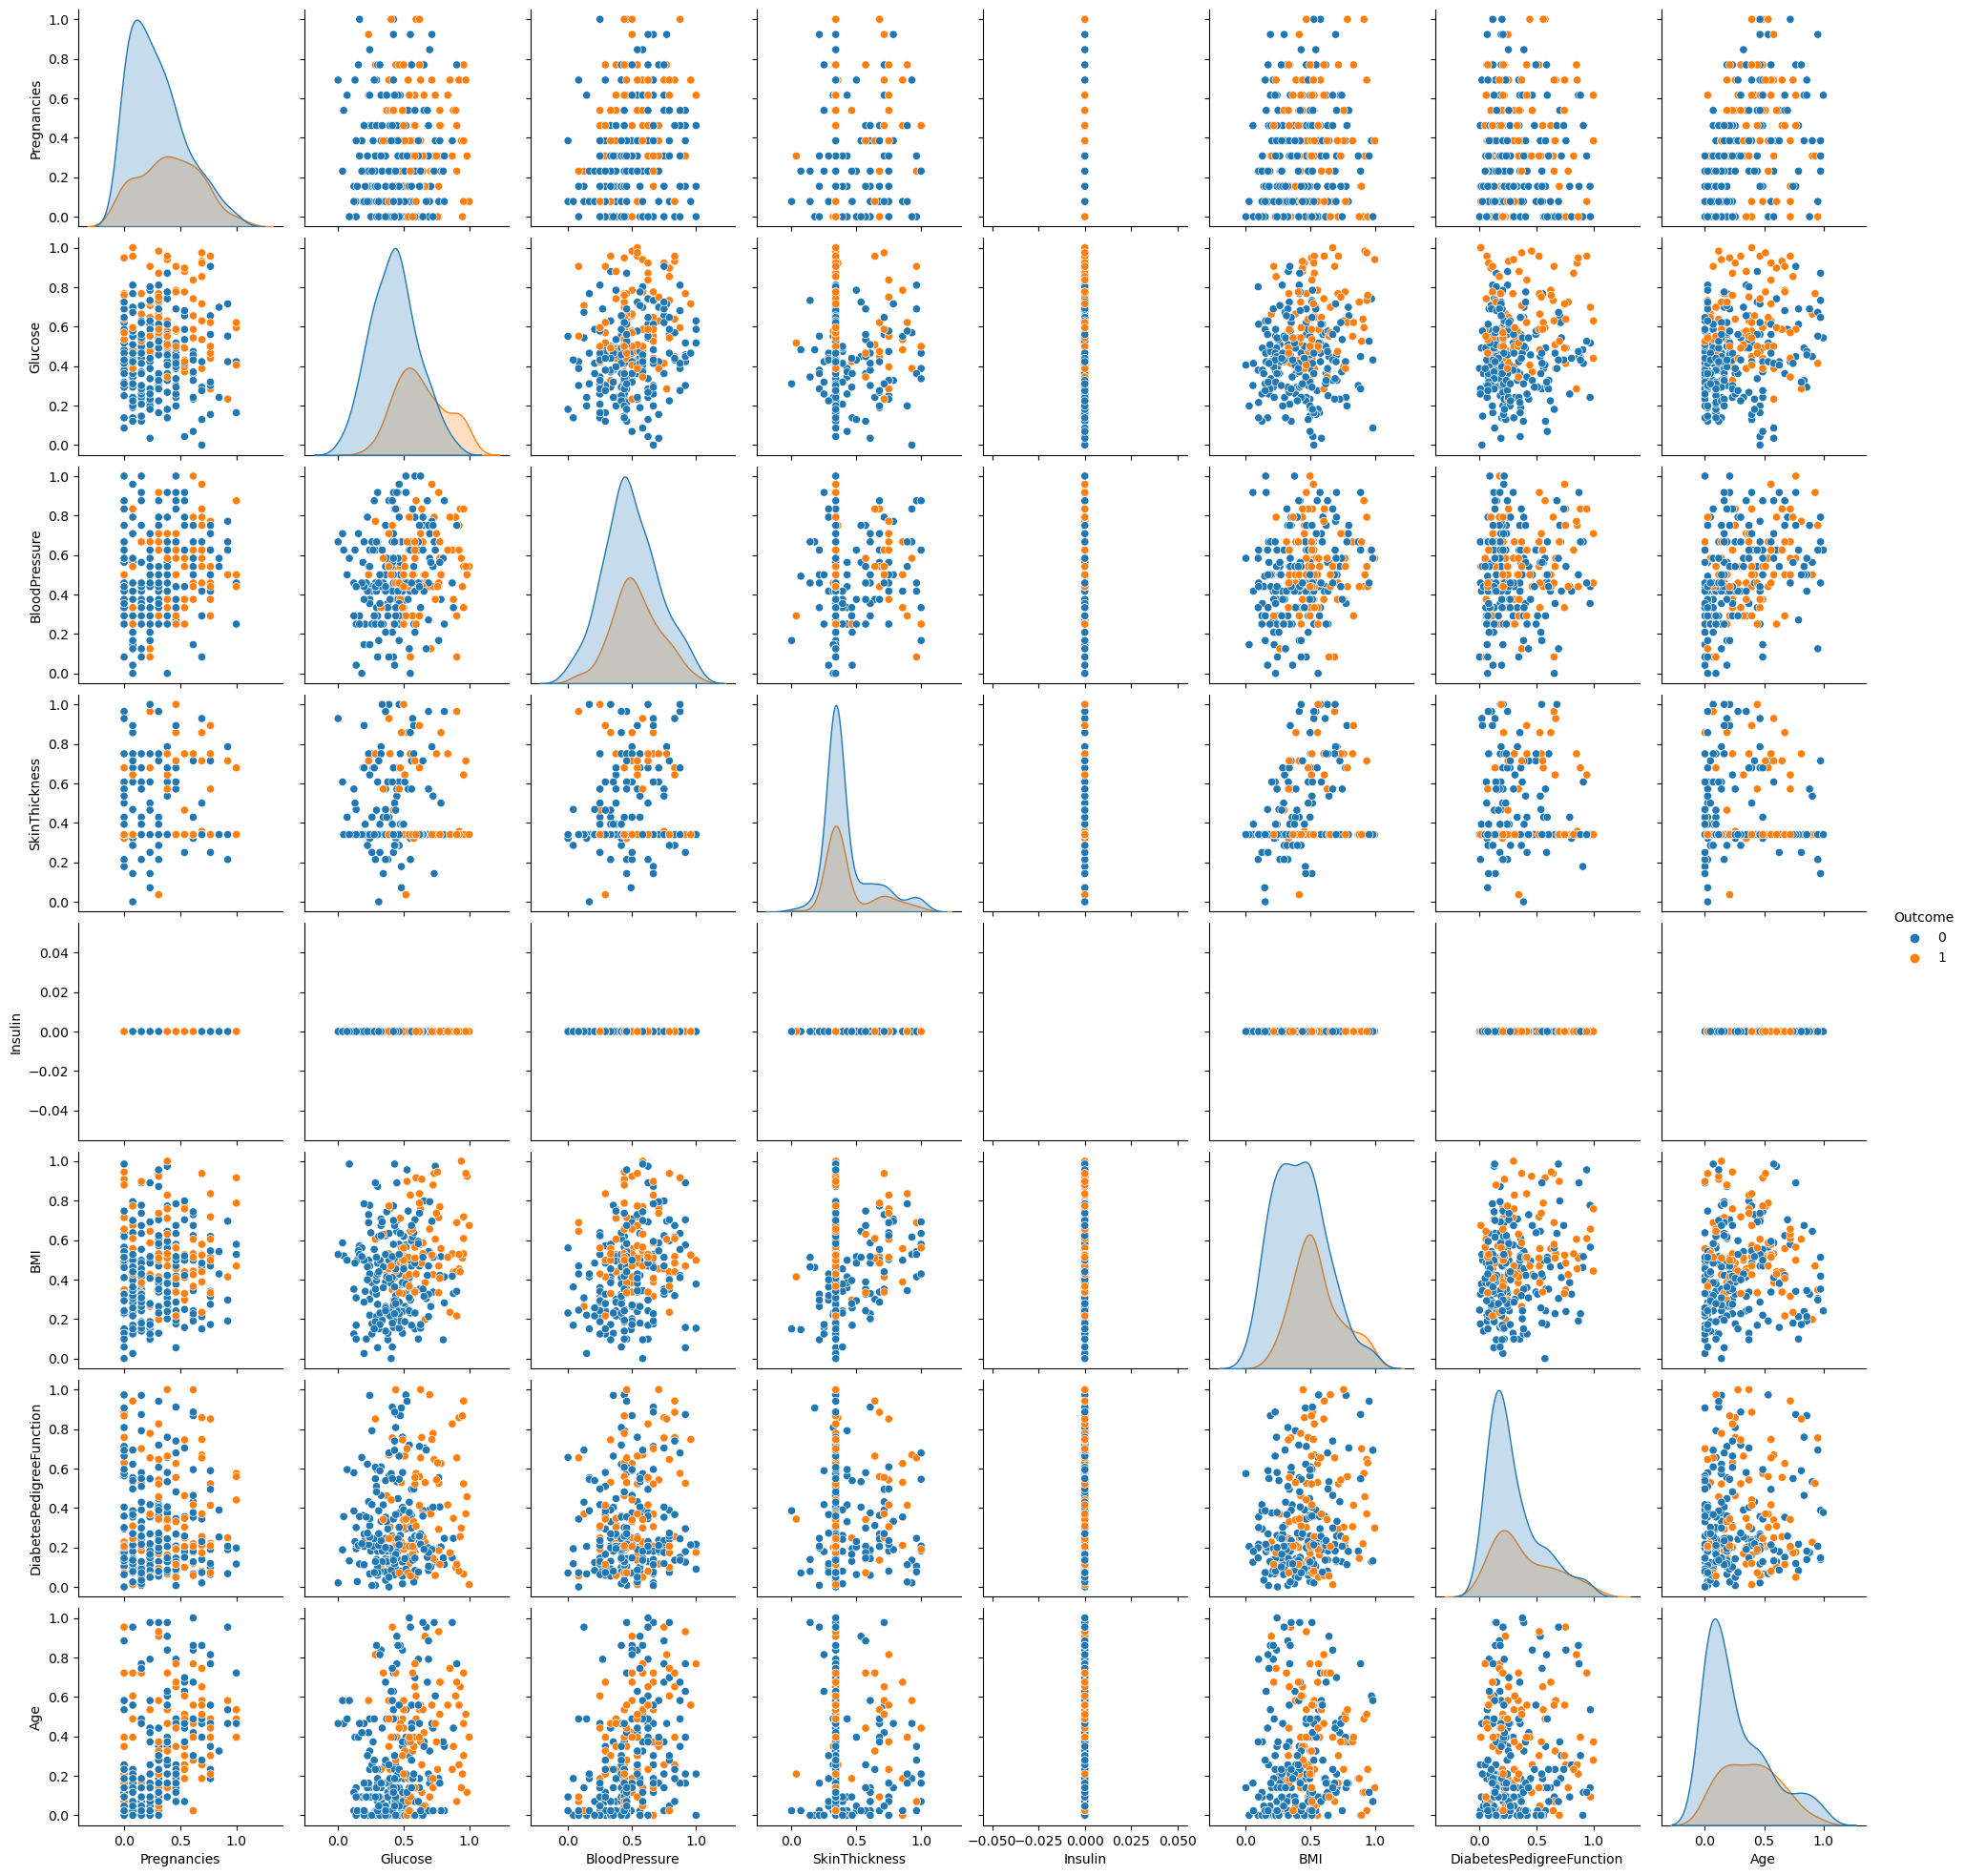

In [68]:
#SECTION 3
#Data visulaization
sns.pairplot(diabetes_data, hue='Outcome', diag_kind='kde')
plt.show()

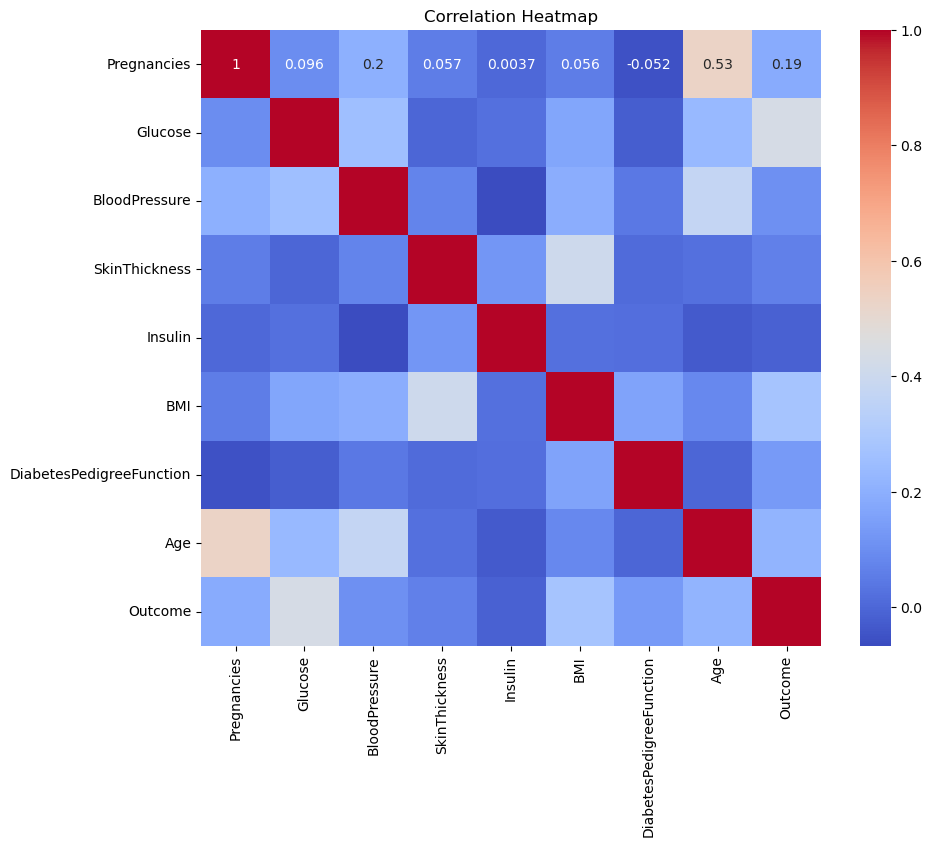

In [9]:
#Statical analysis
corr_matrix = diabetes_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [61]:
#SECTION 4:

#Data splitting

X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [62]:

#Model training and hyper parameter tuning
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [44]:
param_dist_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_dist_rf, n_iter=10, cv=5, random_state=42)
random_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [63]:
#Cros-validation

skf = StratifiedKFold(n_splits=5)
cv_scores_lr = cross_val_score(grid_search_lr.best_estimator_, X_train, y_train, cv=skf)
cv_scores_rf = cross_val_score(random_search_rf.best_estimator_, X_train, y_train, cv=skf)

In [76]:
#SECTION 5 
#Performance Metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

In [77]:
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [81]:
y_pred = model.predict(X_test)

In [84]:
## Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[33  7]
 [ 9 10]]


In [86]:
 # Precision, Recall, F1-Score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.5882352941176471
Recall: 0.5263157894736842
F1 Score: 0.5555555555555555


In [89]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [90]:
 # ROC-AUC

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.8105263157894737


In [91]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

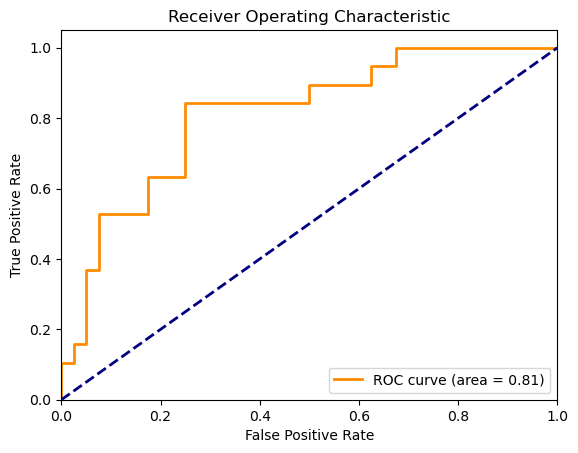

In [92]:
 # Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [94]:
# Evaluate Logistic Regression model
evaluate_model(grid_search_lr.best_estimator_, X_test, y_test)

In [104]:
# Evaluate Random Forest model
evaluate_model(random_search_rf.best_estimator_, X_test, y_test)

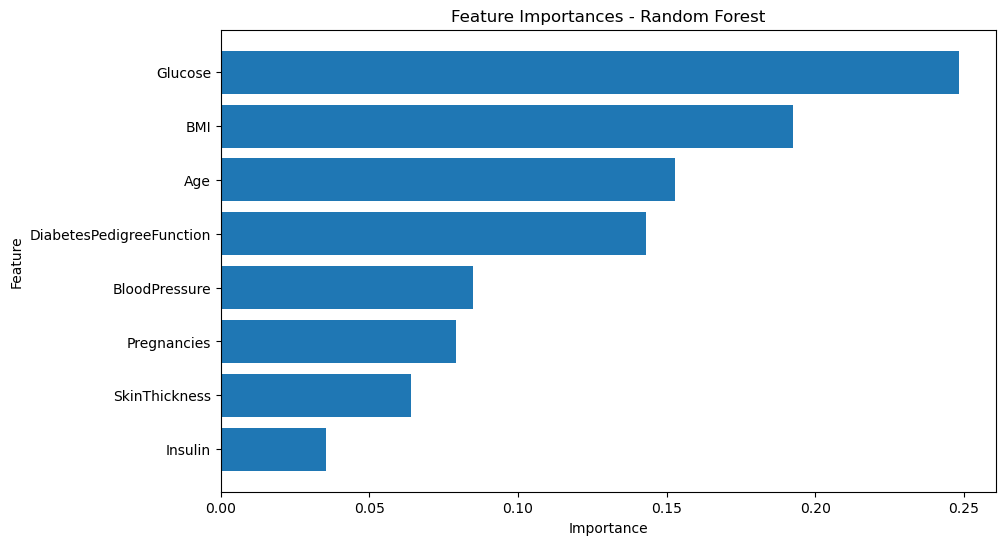

In [102]:
# Feature Importance (Random Forest)
importances = random_search_rf.best_estimator_.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances - Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [112]:
!pip install shap

   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   - ------------------------------------- 20.5/456.1 kB 640.0 kB/s eta 0:00:01
   -- ------------------------------------ 30.7/456.1 kB 435.7 kB/s eta 0:00:01
   --- ----------------------------------- 41.0/456.1 kB 326.8 kB/s eta 0:00:02
   ------- ------------------------------- 92.2/456.1 kB 655.4 kB/s eta 0:00:01
   ----------- -------------------------- 143.4/456.1 kB 774.0 kB/s eta 0:00:01
   ------------------- -------------------- 225.3/456.1 kB 1.1 MB/s eta 0:00:01
   ------------------------ --------------- 276.5/456.1 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------  450.6/456.1 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 1.5 MB/s eta 0:00:00


In [114]:
#SECTION 6
import shap


In [117]:
#Model Interpretation

# SHAP Values (optional, for Random Forest)
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

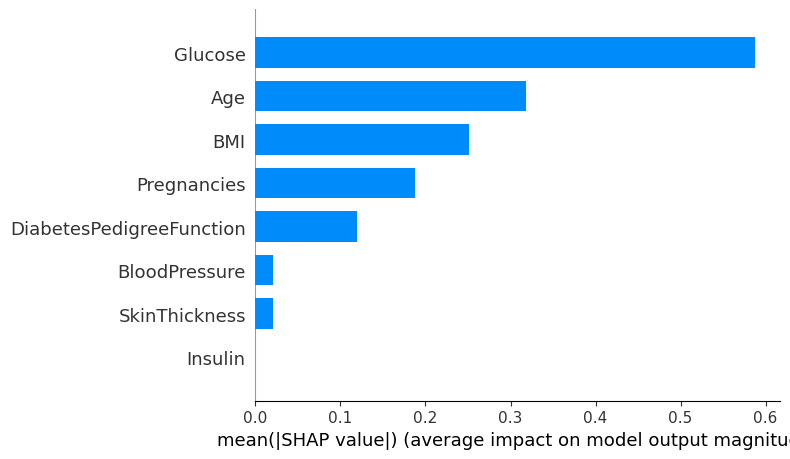

In [118]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


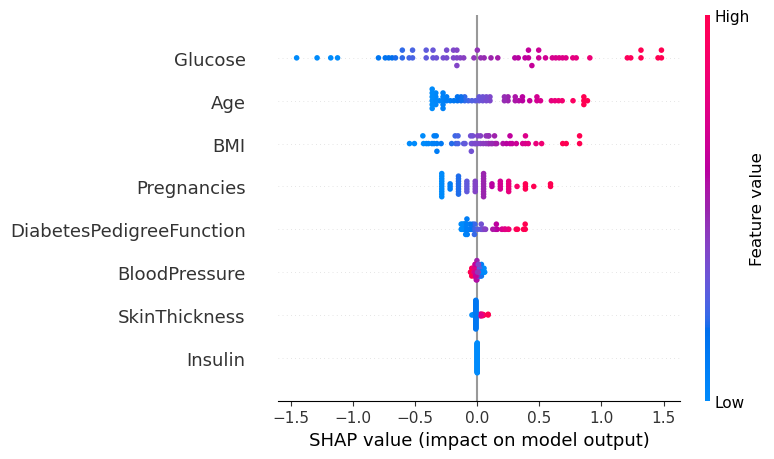

In [119]:
shap.summary_plot(shap_values, X_test)